In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from matplotlib import pyplot as plt
import copy

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5],[0.5])])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


torch.Size([28, 28])


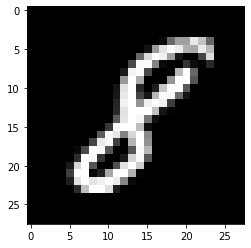

In [31]:
dataset = trainset.train_data
x = dataset[7777]
print(x.shape)

plt.imshow(x, cmap='gray')

In [32]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=256,shuffle=False)

In [34]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=28, kernel_size=3, padding=0)
    self.conv2 = nn.Conv2d(in_channels=28, out_channels=64, kernel_size=3, padding=0)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0)
    self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=0)
    self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=0)
    self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
    self.conv7 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
    self.conv8 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
    self.conv9 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
    self.conv10 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.batch_norm1 = nn.BatchNorm2d(28, track_running_stats = False)
    self.batch_norm2 = nn.BatchNorm2d(128, track_running_stats = False)
    self.dropout1 = nn.Dropout2d(p=0.05)
    self.dropout2 = nn.Dropout2d(p=0.1)
    self.fc1 = nn.Linear(128,64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 10)


  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(self.batch_norm1(x))

    x = (F.relu(self.conv2(x)))
    x = self.pool(x)
    
    x = self.conv3(x)
    x = F.relu(self.batch_norm2(x))

    x = (F.relu(self.conv4(x)))
    x = self.pool(x)
    x = self.dropout1(x)

    x = self.conv5(x)
    x = F.relu(self.batch_norm2(x))

    x = (F.relu(self.conv6(x)))
    x = self.pool(x)

    x = self.conv7(x)
    x = F.relu(self.batch_norm2(x))

    x = self.conv8(x)
    x = F.relu(self.batch_norm2(x))

    x = self.conv9(x)
    x = F.relu(self.batch_norm2(x))

    x = self.conv10(x)
    x = F.relu(self.batch_norm2(x))

    x = x.view(x.size(0), -1)

    x = self.dropout2(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.dropout2(x)
    x = self.fc3(x)
    return x

In [35]:
cnn_net = CNN()#.double()
cnn_net = cnn_net.to("cuda")

In [36]:
print(cnn_net)

CNN(
  (conv1): Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(28, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch_norm1): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
  (batch_norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
  (dropo

In [37]:
import torch.optim as optim
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.SGD(cnn_net.parameters(), lr=0.01, momentum=0.9)

In [38]:
acti = []
loss_curi = []
epochs = 300
for epoch in range(epochs): # loop over the dataset multiple times
    ep_lossi = []

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer_cnn.zero_grad()

        # forward + backward + optimize
        outputs = cnn_net(inputs)
        loss = criterion_cnn(outputs, labels)
        loss.backward()
        optimizer_cnn.step()

        # print statistics
        running_loss += loss.item()
        mini_batch = 50
        if i % mini_batch == mini_batch-1:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / mini_batch))
            ep_lossi.append(running_loss/mini_batch) # loss per minibatch
            running_loss = 0.0
            
    if(np.mean(ep_lossi) <= 0.01):
      break;
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch            

print('Finished Training')

[1,    50] loss: 1.815
[1,   100] loss: 0.321
[1,   150] loss: 0.131
[1,   200] loss: 0.112
[2,    50] loss: 0.069
[2,   100] loss: 0.053
[2,   150] loss: 0.058
[2,   200] loss: 0.054
[3,    50] loss: 0.041
[3,   100] loss: 0.041
[3,   150] loss: 0.040
[3,   200] loss: 0.034
[4,    50] loss: 0.029
[4,   100] loss: 0.030
[4,   150] loss: 0.036
[4,   200] loss: 0.028
[5,    50] loss: 0.023
[5,   100] loss: 0.019
[5,   150] loss: 0.021
[5,   200] loss: 0.022
[6,    50] loss: 0.018
[6,   100] loss: 0.019
[6,   150] loss: 0.021
[6,   200] loss: 0.018
[7,    50] loss: 0.013
[7,   100] loss: 0.013
[7,   150] loss: 0.016
[7,   200] loss: 0.014
[8,    50] loss: 0.009
[8,   100] loss: 0.014
[8,   150] loss: 0.015
[8,   200] loss: 0.020
[9,    50] loss: 0.012
[9,   100] loss: 0.013
[9,   150] loss: 0.011
[9,   200] loss: 0.012
[10,    50] loss: 0.007
[10,   100] loss: 0.008
[10,   150] loss: 0.009
[10,   200] loss: 0.012
Finished Training


In [39]:
torch.save(cnn_net.state_dict(),"/content/drive/My Drive/Research/train_begining_layers_vs_last_layers/cnn_net_10layer.pt")

In [40]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        outputs = cnn_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %d %%' % (total,  100 * correct / total))
print(total,correct)

Accuracy of the network on the 60000 train images: 99 %
60000 59861


In [41]:
correct = 0
total = 0
out = []
pred = []
cnn_net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cuda"),labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs= cnn_net(images)
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total))
print(total,correct)

Accuracy of the network on the 10000 test images: 99 %
10000 9933


In [44]:
classes = ['0','1','2','3','4','5','6','7','8','9']

In [45]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cuda"),labels.to("cuda")
        outputs = cnn_net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 100 %
Accuracy of     1 : 100 %
Accuracy of     2 : 100 %
Accuracy of     3 : 100 %
Accuracy of     4 : 100 %
Accuracy of     5 : 90 %
Accuracy of     6 : 100 %
Accuracy of     7 : 100 %
Accuracy of     8 : 100 %
Accuracy of     9 : 100 %
